# Property Prices in Dublin
A short analysis of house prices in Dublin 2020.

<img src="../images/house_prices.jpg" alt="Houses" style="width: 800px; align:center;"/>



## Step 1: Import Libraries
A library is Python Code which is normally open source and available for general use. Libraries save programming time as it save you a heap of time re-writing code. Pandas and Matplotlib are the most popular among Data Analysists


In [1]:
# Import
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns 
sns.set(style="darkgrid")

## Step 2: Import your data
Data can be imported in many different ways: csv, Excel,text,database etc. For this example we are importing our data from a CSV file (Comma Separated Values). Most programs can export data as a csv file. The data below was taken from Data Gov a government information portal. I have sanitised the data to exclude apartment blocks etc.

In [2]:
df = pd.read_csv('dublin_house_prices.csv')

## Step 3: Examine the data
At this step we examine the data to see what it contains etc.

In [3]:
# Get number of rows and columns
df.shape

(9853, 10)

In [4]:
# Sample the data
df.tail(5)

,_id,Date,Address,Postal_Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
9848,2324,2019-02-27T00:00:00,"65 WHITECHURCH WAY, BALLYBODEN, DUBLIN",Dublin 16,Dublin,"€12,463.22",Yes,No,Second-Hand Dwelling house /Apartment,NaN
9849,469,2019-01-18T00:00:00,"4 CAMBRIDGE TERRACE, RANELAGH, DUBLIN 6",Dublin 6,Dublin,"€10,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9850,1519,2019-02-12T00:00:00,"67 GRANGE PARK RD, RAHENY, DUBLIN 5",Dublin 5,Dublin,"€8,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9851,3493,2019-03-27T00:00:00,"20 WATERSIDE GROVE, SWORDS ROAD, MALAHIDE",NaN,Dublin,"€8,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9852,6168,2019-05-24T00:00:00,"3 ARBOUR HILL, STONEYBATTER, DUBLIN 7",Dublin 7,Dublin,"€5,900.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [ ]:
# How many properties sold by Postal Code
#df["Postal_Code"].value_counts()

## Step 4: Clense the data
Next we convert the house prices into numerical values so that we can carry out our analysis.

In [5]:
# Convert the price into a floating point number
num_price = df['Price'].replace( '[\€,) ]+','',regex=True ).replace( '[(]','-',     regex=True ).replace( '', 'NaN',     regex=True ).astype(float) 

# Add the column 'num_price' to the data.
df['num_price'] = num_price

In [6]:
df.head(2)

,_id,Date,Address,Postal_Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,num_price
0,2025,2019-02-21T00:00:00,"APT 8, THE GARDEN HOUSE, WATERFALL AVE",Dublin 3,Dublin,"€6,750,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN,6750000.0
1,4513,2019-04-16T00:00:00,"49 AILESBURY RD, BALLSBRIDGE, DUBLIN 4",Dublin 4,Dublin,"€6,750,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN,6750000.0


## Step 5: Analysis of our new data set
Here we take a look at the dataset as a whole. For analysis of our data we are going to represent the data as a Box Plot (Whisker Diagrams). Box Plots represent the spread of the data the following diagram illustrates the main values identified by a box plot.<br>
<img src="boxplot_explained.jpg" alt="Box Plot" align="left" width="500"/> <br>

|Value | Definition  |   
|---|---|
| Max Value  | The maximum value of your data set.  |
| Min Value |  The minimum value of your data set. |
|Median| The value exactly half between maximum and minimum.|   
|Q1| 25% of your values are below this value.| 
|Q3| 75% of your values are below this value.| 
|IQR| Measure of the range of values between Q1 and Q3.|



In [7]:
#general analysis of the prices
# df["price"].describe().apply(lambda x: format(x, 'f'))
df['num_price'].describe().apply(lambda x: format(x, '.2f'))

count       9853.00
mean      416031.40
std       325655.16
min         5900.00
25%       265000.00
50%       338000.00
75%       458149.00
max      6750000.00
Name: num_price, dtype: object

In [8]:
#Create a Boxplot of all our data broken down by area.
plt.figure(figsize=(12,100))# Plot size
#sns.boxplot( x=df["num_price"], y=df["Postal_Code"], palette="Reds", width=0.2)

<Figure size 864x7200 with 0 Axes>

<Figure size 864x7200 with 0 Axes>

## Step 6: Filter our data
Filter the data to zoom in on different aspects.

In [9]:
#Create a filter
filt = (df['Postal_Code']=='Dublin 1')

In [10]:
# Apply the filter and put the values into a new Data Frame
df_d1 = df[filt]
df_d1.head(2)

,_id,Date,Address,Postal_Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,num_price
7,4083,2019-04-08T00:00:00,"5 SPENCER HOUSE, CUSTOM HOUSE SQ, MAYOR ST LOW...",Dublin 1,Dublin,"€4,064,100.00",No,No,Second-Hand Dwelling house /Apartment,NaN,4064100.0
45,3665,2019-03-29T00:00:00,"24A 25 25A, HILL STREET, DUBLIN 1",Dublin 1,Dublin,"€2,407,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN,2407000.0


In [11]:
# A more complex filter
filt = ((df['Postal_Code']=='Dublin 8') | (df['Postal_Code']=='Dublin 6')) & (df['num_price'] <= 1000000)
df_compare = df.loc[filt, ['Postal_Code', 'Price','num_price']]

In [12]:
df_compare

,Postal_Code,Price,num_price
336,Dublin 6,"€1,000,000.00",1000000.0
337,Dublin 6,"€1,000,000.00",1000000.0
343,Dublin 8,"€1,000,000.00",1000000.0
352,Dublin 6,"€984,950.00",984950.0
353,Dublin 6,"€980,000.00",980000.0
...,...,...,...
9810,Dublin 8,"€45,000.00",45000.0
9811,Dublin 8,"€43,500.00",43500.0
9833,Dublin 8,"€20,000.00",20000.0
9840,Dublin 8,"€15,000.00",15000.0


## Step 7: Graphical Analysis
The following use the Seaborn and MatPlotlib libraries to graph our data

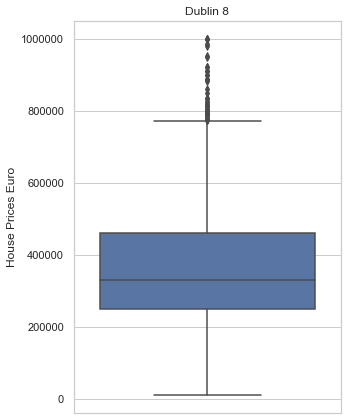

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(5,6))
sns.boxplot( y=df_compare["num_price"] )
plt.title("Dublin 8")
plt.ylabel("House Prices Euro") 
plt.tight_layout()
plt.show()

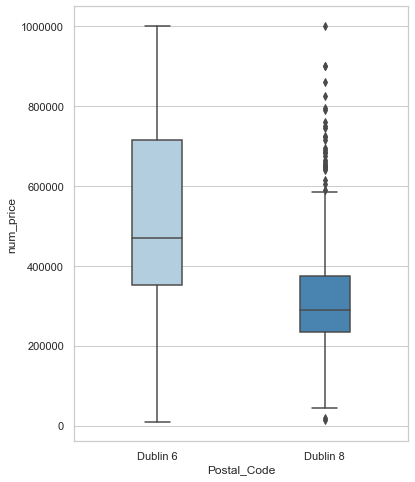

In [14]:
plt.figure(figsize=(6,8))
sns.boxplot( x=df_compare["Postal_Code"], y=df_compare["num_price"], palette="Blues", width=0.3)

In [ ]:
# Horizontal Plot
plt.figure(figsize=(8,7))
# Plotting two colums
ax=sns.boxplot( x=df_compare["num_price"], y=df_compare["Postal_Code"], palette="Blues", width=0.3)

# Setting tic marks on x columne
ax.xaxis.set_major_locator(ticker.MultipleLocator(500000))


In [ ]:
# Save the figure
ax.figure.savefig('dublin6_8.png')

In [ ]:
# Size in Inches
a4_dims = (11.7, 9.27)


# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,figsize=a4_dims, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
x= sns.boxplot(df_compare["num_price"], ax=ax_box)
sns.distplot(df_compare["num_price"], ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')


## Step 8: Saving your notebook
- If you have changed your data you can save the data to a CSV
- you can save your charts as a png/jpg etc.
- You can save your Jupyter Notebook as an HTML file or a PDF.


In [ ]:
# Save the figure
f.savefig('VarianceAnalysis.png')

Thank You!                                                                           version 1.0 (Morgan McKnight)

### PS: Fascinating  analysis of the complexity of buying a house in Dublin. 
The following is a link to a Data Scientist's Python Program to help him/her buy a house in Dublin.<br>
[Go to Buying a House in Dublin](https://towardsdatascience.com/the-perks-of-data-science-how-i-found-my-new-home-in-dublin-5ff84fc97ec4)

[Dashboard](https://datastudio.google.com/u/0/reporting/ba7e1b93-8d6e-420c-8230-58bd5dba9157/page/4omWB?s=qKDxt8i2ezE)